# MEEN 689 HOMEWORK 4
Name: Chinonyelum Okereafor

UIN: 733001665

Datasets are included in the Excel file: HW4data.xlsx

1. See Datasheet 1 for the data of a 2^3 full factorial design of experiment, where
“1” means low level and “2” means high level. Each case has 3 replications.

In [501]:
#Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

In [468]:
#Reading the Excel file Q1 sheet into Python
df1 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 4/HW4 Data.xlsx',
                    sheet_name = 'Q1')
print("Sheet Q1 Table:")
df1

Sheet Q1 Table:


,Factor A,Factor B,Factor C,Replication,Response
0,1,1,1,1,54.967142
1,1,1,2,1,48.617357
2,1,2,1,1,56.476885
3,1,2,2,1,65.230299
4,2,1,1,1,47.658466
5,2,1,2,1,47.658630
6,2,2,1,1,65.792128
7,2,2,2,1,57.674347
8,1,1,1,2,45.305256
9,1,1,2,2,55.425600


a. Calculate main effects, and the effect of two-way interactions (you can use Excel, R, Minitab or hand calculation).

**CREATE INTERACTIONS WITH USER DEFINED FUNCTIONS**

In [469]:
def interaction_A_B(x):
  if x['Factor A'] == 1 and x['Factor B'] == 1:
    return 2
  elif x['Factor A'] == 1 and x['Factor B'] == 2:
    return 1
  elif x['Factor A'] == 2 and x['Factor B'] == 1:
    return 1
  elif x['Factor A'] == 2 and x['Factor B'] == 2:
    return 2

In [470]:
def interaction_A_C(x):
  if x['Factor A'] == 1 and x['Factor C'] == 1:
    return 2
  elif x['Factor A'] == 1 and x['Factor C'] == 2:
    return 1
  elif x['Factor A'] == 2 and x['Factor C'] == 1:
    return 1
  elif x['Factor A'] == 2 and x['Factor C'] == 2:
    return 2

In [471]:
def interaction_B_C(x):
  if x['Factor B'] == 1 and x['Factor C'] == 1:
    return 2
  elif x['Factor B'] == 1 and x['Factor C'] == 2:
    return 1
  elif x['Factor B'] == 2 and x['Factor C'] == 1:
    return 1
  elif x['Factor B'] == 2 and x['Factor C'] == 2:
    return 2

**Apply Interraction Functions to columns**

In [472]:
df1['Factor AB'] = df1.apply(interaction_A_B, axis=1)
df1['Factor AC'] = df1.apply(interaction_A_C, axis=1)
df1['Factor BC'] = df1.apply(interaction_B_C, axis=1)

df1.head()

,Factor A,Factor B,Factor C,Replication,Response,Factor AB,Factor AC,Factor BC
0,1,1,1,1,54.967142,2,2,2
1,1,1,2,1,48.617357,2,1,1
2,1,2,1,1,56.476885,1,2,1
3,1,2,2,1,65.230299,1,1,2
4,2,1,1,1,47.658466,1,1,2


**Calculate main effects by averaging the response when factor is at high level (2) and low level (1)**

In [473]:
main_effects = {}
for factor in ['Factor A', 'Factor B', 'Factor C']:
    high_level_mean = df1[df1[factor] == 2]['Response'].mean()
    low_level_mean = df1[df1[factor] == 1]['Response'].mean()
    main_effects[factor] = high_level_mean - low_level_mean

In [474]:
print("Main Effects:")
for factor, effect in main_effects.items():
    print(f"{factor}: {effect}")

Main Effects:
Factor A: -0.7097571066415753
Factor B: -1.0081254273103397
Factor C: -2.429326068198243


**Calculate effects for interactions**

In [475]:
interr_main_effects = {}
for inter in ['Factor AB', 'Factor AC', 'Factor BC']:
    high_level_mean = df1[df1[inter] == 2]['Response'].mean()
    low_level_mean = df1[df1[inter] == 1]['Response'].mean()
    interr_main_effects[inter] = high_level_mean - low_level_mean

In [476]:
print("Main Effect for interactions:")
for inter, effect in interr_main_effects.items():
    print(f"{inter}: {effect}")

Main Effect for interactions:
Factor AB: 0.3447221568270322
Factor AC: -5.884132834871025
Factor BC: 1.1415351644510139


b. Plot your data with an error bar representing 95% SEM. Note this question does not
ask for main effect and factorial plots, just how you should present your data.

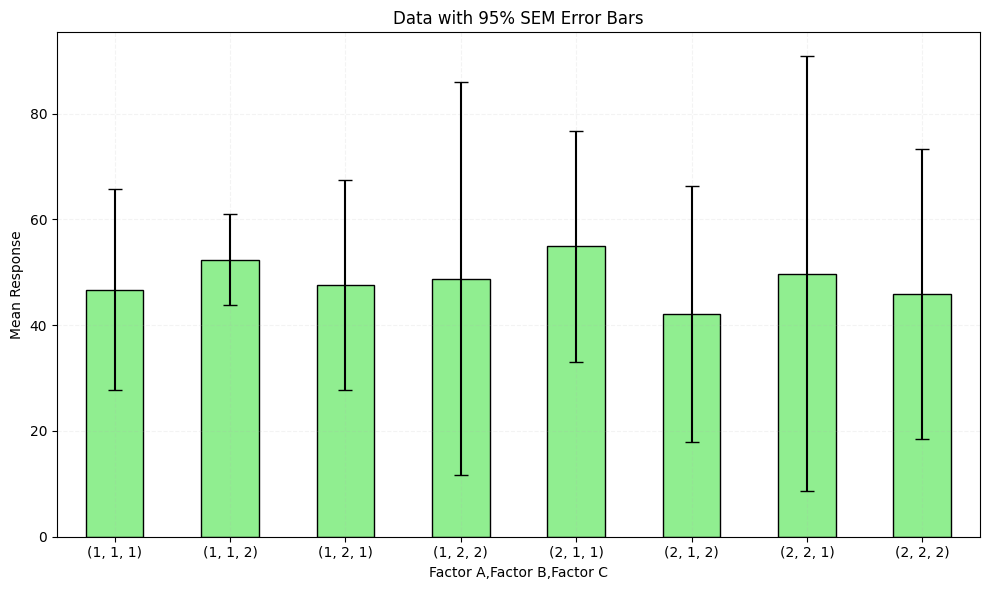

In [477]:
# Calculate the mean and standard error of the mean (SEM) for each group combination
group_means = df1.groupby(['Factor A', 'Factor B', 'Factor C'])['Response'].mean()
group_sem = df1.groupby(['Factor A', 'Factor B', 'Factor C'])['Response'].sem()

# Calculate the 95% confidence interval (using the SEM * t-value for 95% confidence)
confidence_interval = group_sem * stats.t.ppf((1 + 0.95) / 2., df1['Replication'].nunique() - 1)

# Create a bar plot with error bars representing 95% SEM
group_means.plot(kind='bar', yerr=confidence_interval, capsize=5, color='lightgreen', edgecolor = 'black', figsize=(10, 6))

# Add labels and title
plt.ylabel('Mean Response')
plt.title('Data with 95% SEM Error Bars')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(visible=True, linestyle='--', alpha=0.15)

# Show the plot
plt.show()

1c. Calculate the threshold, over which the effect (magnitude) is considered statistically significant at 95% confidence. Find if any effect (from Part a) is significant.

In [528]:
# The degrees of freedom for replication (replications per group minus 1)
df_replication = df1['Factor A'].nunique() - 1

# Critical t-value for 95% confidence level with df_replication degrees of freedom
t_critical = stats.t.ppf(1 - 0.05 / 2, df_replication)

# Calculate the SEM for the main effects of Factor A, Factor B, and Factor C
sem_A = df1.groupby('Factor A')['Response'].sem()
sem_B = df1.groupby('Factor B')['Response'].sem()
sem_C = df1.groupby('Factor C')['Response'].sem()

# Calculate the significance threshold for each factor
threshold_A = t_critical * sem_A.mean()
threshold_B = t_critical * sem_B.mean()
threshold_C = t_critical * sem_C.mean()

# Calculate the mean effects for Factors A, B, and C
factor_A_effect = df1.groupby('Factor A')['Response'].mean().reset_index()
factor_B_effect = df1.groupby('Factor B')['Response'].mean().reset_index()
factor_C_effect = df1.groupby('Factor C')['Response'].mean().reset_index()

# Calculate the main effects for Factors A, B, and C
factor_A_main_effect = factor_A_effect.iloc[1,1] - factor_A_effect.iloc[0,1]
factor_B_main_effect = factor_B_effect.iloc[1,1] - factor_B_effect.iloc[0,1]
factor_C_main_effect = factor_C_effect.iloc[1,1] - factor_C_effect.iloc[0,1]


# Compare main effects to the threshold
main_effect_A_significant = abs(factor_A_effect['Response'] - factor_A_effect['Response'].mean()) > threshold_A
main_effect_B_significant = abs(factor_B_effect['Response'] - factor_B_effect['Response'].mean()) > threshold_B
main_effect_C_significant = abs(factor_C_effect['Response'] - factor_C_effect['Response'].mean()) > threshold_C


# Function to calculate interaction effects
def calculate_interaction_effects(df, factors):
    interaction_effects = {}
    for factor1, factor2 in combinations(factors, 2):
        avg_11 = df1[(df1[factor1] == 1) & (df1[factor2] == 1)]['Response'].mean()
        avg_12 = df1[(df1[factor1] == 1) & (df1[factor2] == 2)]['Response'].mean()
        avg_21 = df1[(df1[factor1] == 2) & (df1[factor2] == 1)]['Response'].mean()
        avg_22 = df1[(df1[factor1] == 2) & (df1[factor2] == 2)]['Response'].mean()
        interaction_effect = (avg_11 + avg_22 - avg_12 - avg_21) / 2
        interaction_effects[f"{factor1}*{factor2}"] = interaction_effect
    return interaction_effects

# Factors
factors = ['Factor A', 'Factor B', 'Factor C']

# Calculate interaction effects/Threshold
print("Threshold at 95% Confidence: ",confidence_interval.iloc[0] )

interaction_effects = calculate_interaction_effects(df1, factors)

# Create a DataFrame for the interaction results
interaction_table = pd.DataFrame({
    'Interaction': list(interaction_effects.keys()),
    'Interaction Effect': interaction_effects.values(),
    'Threshold':confidence_interval.iloc[0],
    'Significant': [main_effect_A_significant.values[0], main_effect_B_significant.values[0], 
                    main_effect_C_significant.values[0]]
})

# Display the Interaction results table
print("Results Table for Interaction Effects and Significance:")
interaction_table

Threshold at 95% Confidence:  18.993188458543546
Results Table for Interaction Effects and Significance:


,Interaction,Interaction Effect,Threshold,Significant
0,Factor A*Factor B,0.344722,18.993188,False
1,Factor A*Factor C,-5.884133,18.993188,False
2,Factor B*Factor C,1.141535,18.993188,False


**Table for Main Effects and Significance**

In [531]:
# Calculate Main effects/threshold
print("Threshold at 95% Confidence: ",confidence_interval.iloc[0] )
print('\n')

# Create a results table for Main Effects and Significance
results_table = pd.DataFrame({
    'Factor': ['Factor A', 'Factor B', 'Factor C'],
    'Main Effect': [factor_A_main_effect, factor_B_main_effect, factor_C_main_effect],
    'Threshold':confidence_interval.iloc[0],
    'Significant': [main_effect_A_significant.values[0], main_effect_B_significant.values[0], main_effect_C_significant.values[0]]
})

print("Results Table for Main Effects and Significance:")
results_table

Threshold at 95% Confidence:  18.993188458543546


Results Table for Main Effects and Significance:


,Factor,Main Effect,Threshold,Significant
0,Factor A,-0.709757,18.993188,False
1,Factor B,-1.008125,18.993188,False
2,Factor C,-2.429326,18.993188,False


The calculated threshold(s) for statistical significance at the 95% confidence level are:

**Threshold A:** 18.993,

**Threshold B:** 18.993,

**Threshold C:** 18.993

After comparing the main effects to these thresholds:

**Factor A**, **Factor B**, and **Factor C** do not have any statistically significant effects at the 95% confidence level. All calculated effects fall below the respective thresholds.

There is no effect from part (a) that is significant.

d. Also, run a 3-way ANOVA with all interactions included, and conclude the outcomes.

In [479]:
Factor_A = df1['Factor A'].astype('category')
Factor_B = df1['Factor B'].astype('category')
Factor_C = df1['Factor C'].astype('category')
Response = df1['Response']

# Define the formula for the 3-way ANOVA with all interactions included;
formula = 'Response ~ Factor_A + Factor_B + Factor_C + Factor_A:Factor_B + Factor_A:Factor_C  + Factor_B:Factor_C + Factor_A:Factor_B:Factor_C'

# Fit the model
model = ols(formula,data = df1).fit()

# Perform the ANOVA
three_way_anova_results = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("3-Way ANOVA Table with all interactions:")
three_way_anova_results

3-Way ANOVA Table with all interactions:


,sum_sq,df,F,PR(>F)
Factor_A,3.022531,1.0,0.026112,0.873650
Factor_B,6.097901,1.0,0.052680,0.821372
Factor_C,35.409751,1.0,0.305908,0.587848
Factor_A:Factor_B,0.713000,1.0,0.006160,0.938417
Factor_A:Factor_C,207.738115,1.0,1.794668,0.199077
Factor_B:Factor_C,7.818615,1.0,0.067546,0.798259
Factor_A:Factor_B:Factor_C,68.027265,1.0,0.587694,0.454476
Residual,1852.046820,16.0,NaN,NaN


**Conclusion of outcomes:**

The results of the 3-way ANOVA with all interactions included are as follows:

**Factor A:**
F(1,16)=0.026, p=0.874 (not significant)

**Factor B:** F(1,16)=0.053, p=0.821 (not significant)

**Factor C:** F(1,16)=0.306, p=0.588 (not significant)

**Interaction A × B:** F(1,16)=0.006, p=0.938 (not significant)

**Interaction A × C:** F(1,16)=1.795, p=0.199 (not significant)

**Interaction B × C:** F(1,16)=0.068, p=0.798 (not significant)

**Interaction A × B × C:** F(1,16)=0.588, p=0.454 (not significant)

.

**Conclusion:**
None of the main effects or interactions are statistically significant at the 95% confidence level. This suggests that there are no significant individual or combined effects of Factors A, B, and C on the response variable.

e. Compare c) and d) to see if the results are consistent. If not, explain why.

**Explanation:**

**Part (c): Significance Thresholds**

In part (c), significance test was performed by comparing the main effects of factors A,B, and C against threshold calculated based on the standard error and a t-critical value. The results show that:

**Factor A:** Main effect = -0.71, Threshold = 18.993, Significant = False

**Factor B:** Main effect = -1.01, Threshold = 18.993, Significant = False

**Factor C:** Main effect = -2.43, Threshold = 18.993, Significant = False

This means that none of the main effects were significant at the 95% confidence level in part (c).

**Part (d): 3-Way ANOVA Results**

In part (d), a 3-way ANOVA was performed, showing the
**F-statistics** and **p-values** for each factor and their interactions:

**Factor A:** F(1,16)=0.026, p=0.874,

**Factor B:** F(1,16)=0.053, p=0.821,

**Factor C:** F(1,16)=0.306, p=0.588

All **p-values** are greater than 0.05, indicating **no significant effects** for any factor or interaction.

**Comparison:**

Both part (c) and part (d) show **no significant effects** for factors A, B, and C.

The consistency between the results shows that both tests (significance threshold in part (c) and ANOVA in part (d)) concludes that none of the factors have statistically significant effects on the response variable including the higher order interaction terms (A x B x C).



2. Assume you are to create a Fractional Design for 6 variables, ABCDEF.

In [480]:
#Reading the Excel file Q2 sheet into Python
df2 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 4/HW4 Data.xlsx',
                    sheet_name = 'Q2')
print("Sheet Q2 Table:")
df2

Sheet Q2 Table:


,A,B,C,D,E,F,Response
0,-1,-1,-1,1,1,1,-0.013497
1,-1,-1,-1,1,1,1,-1.057711
2,1,-1,-1,-1,-1,1,0.822545
3,1,-1,-1,-1,-1,1,-1.220844
4,-1,1,-1,-1,1,-1,0.208864
5,-1,1,-1,-1,1,-1,-1.959670
6,1,1,-1,1,-1,-1,-1.328186
7,1,1,-1,1,-1,-1,0.196861
8,-1,-1,1,1,-1,-1,0.738467
9,-1,-1,1,1,-1,-1,0.171368


a. Generate a design with Resolution 3 using the generators D = AB, E = AC, and F = BC.

In [481]:
# Create the fractional design with only the generated columns for D, E, F
# D = AB, E = AC, and F = BC
#We have 2^(k-p) where k = variables/factors = 6 and p = number of generators = 3, therefore 2^(6-3) = 2^3 = 8 runs
def generate_factor_levels(num_factors):
    # Number of rows is 2^num_factors
    num_rows = 2 ** num_factors
    # Initialize the matrix
    levels = np.zeros((num_rows, num_factors))

    for i in range(num_factors):
        repeat_length = 2 ** (num_factors - i - 1)
        levels[:, i] = np.tile(np.repeat([-1, 1], repeat_length), 2 ** i)

    return levels

# Generate the design matrix for A, B, C
levels = generate_factor_levels(3)
df_auto = pd.DataFrame(levels, columns=['A', 'B', 'C'])

# Add the generators for D, E, and F
df_auto['D'] = df_auto['A'] * df_auto['B']
df_auto['E'] = df_auto['A'] * df_auto['C']
df_auto['F'] = df_auto['B'] * df_auto['C']

# Display the design matrix generated automatically
print("Design Matrix Generated Automatically:")

Generated_design = df_auto.astype(int)
Generated_design

Design Matrix Generated Automatically:


,A,B,C,D,E,F
0,-1,-1,-1,1,1,1
1,-1,-1,1,1,-1,-1
2,-1,1,-1,-1,1,-1
3,-1,1,1,-1,-1,1
4,1,-1,-1,-1,-1,1
5,1,-1,1,-1,1,-1
6,1,1,-1,1,-1,-1
7,1,1,1,1,1,1


b. Can you choose different generators and create a different template? Explain and try.

Yes, we can choose different generators for the fractional factorial design. The goal is to create a new set of defining relations using different combinations of interactions to construct the factors
D,E, and F.

Choosing new generators:

D=BC,

E=AB,

F=AC,

These new generators will change how we calculate the values for
D, E, and F resulting in a different fractional factorial design:

In [482]:
# Apply a new fractional factorial design using the new generators:
# D = BC, E = AB, and F = AC
Generated_design['D'] = Generated_design['B'] * Generated_design['C']
Generated_design['E'] = Generated_design['A'] * Generated_design['B']
Generated_design['F'] = Generated_design['A'] * Generated_design['C']

# Create the fractional design with the new generated columns for D, E, F
new_fractional_design = Generated_design[['A', 'B', 'C', 'D', 'E', 'F']]

# Display the new fractional design
print("New Fractional Design:")

new_fractional_design

New Fractional Design:


,A,B,C,D,E,F
0,-1,-1,-1,1,1,1
1,-1,-1,1,-1,1,-1
2,-1,1,-1,-1,-1,1
3,-1,1,1,1,-1,-1
4,1,-1,-1,1,-1,-1
5,1,-1,1,-1,-1,1
6,1,1,-1,-1,1,-1
7,1,1,1,1,1,1


c. See Datasheet 2 for the collected data with two replications for each case. Calculate the main effects.

In [483]:
# Calculate the mean response for each combination of factors
mean_response = df2.groupby(['A', 'B', 'C', 'D', 'E', 'F']).mean().reset_index()

# Calculate main effects by averaging the response when factor is +1 and -1
main_effects = {}
for factor in ['A', 'B', 'C', 'D', 'E', 'F'] * 2: #With 2 replications in each case
    high_level_mean = mean_response[mean_response[factor] == 1]['Response'].mean()
    low_level_mean = mean_response[mean_response[factor] == -1]['Response'].mean()
    main_effects[factor] = high_level_mean - low_level_mean

# Display the calculated main effects
main_effects_df = pd.DataFrame(list(main_effects.items()), columns=['Factor', 'Main Effect'])
print("Main Effects Table:")

main_effects_df

Main Effects Table:


,Factor,Main Effect
0,A,0.345082
1,B,-0.438449
2,C,0.405355
3,D,0.508501
4,E,0.021984
5,F,-0.085293


d. List all confounded terms between main effects and two-way interactions (higher orders are not needed)

**Answer:**

Since we're working with six factors
A, B, C, D, E, and F, and we've already used generators to define D, E, and F (both for the initial design and the alternative one), here are the confounded terms between main effects and two-way interactions:

**Given generators:**

In the initial design:

D=AB, E=AC, and F=BC.

In the alternative design:

D=BC, E=AB, and F=AC.


**Confounded terms (main effects with two-way interactions):**

For both designs, we follow the alias structure created by the generators:

I + ABD + ACE + BCF + DEF + ABEF + ACDF + BCDE.

We are focusing on main effects and two-way interactions only.


**Initial design:**

**D=AB:** The main effect of D is confounded with the two-way interaction AB.

**E=AC:** The main effect of E is confounded with the two-way interaction AC.

**F=BC:** The main effect of F is confounded with the two-way interaction BC.

**Confounded terms:**

A + BD + CE
B + AD + CF
C + AE + BF
D + AB + EF
E + AC + DF
F + BC + DE

D∼AB, E∼AC and F∼BC.

**Alternative design:**

**D=BC:** The main effect of D is confounded with the two-way interaction
BC.

**E=AB:** The main effect of E is confounded with the two-way interaction AB.

**F=AC:** The main effect of F is confounded with the two-way interaction AC.

**Confounded terms:**

D∼BC, E∼AB and F∼AC.

.

**Conclusion:**

In both designs, the main effects D, E, and F are confounded with their respective two-way interactions (either AB, AC, or BC) based on the generators used.
No other main effects (A, B, C) are confounded with two-way interactions in these specific designs.

e. Based on d), run a proper ANOVA and show the output.

In [484]:
# Performing ANOVA on the fractional factorial design data to check the effects
Factor_A = df2['A'].astype('category')
Factor_B = df2['B'].astype('category')
Factor_C = df2['C'].astype('category')
Factor_D = df2['D'].astype('category')
Factor_E = df2['E'].astype('category')
Factor_F = df2['F'].astype('category')
Response = df2['Response']

# Define the formula for ANOVA considering the confounded terms
formula = 'Response ~ Factor_A + Factor_B + Factor_C + Factor_D + Factor_E + Factor_F + Factor_A:Factor_F'

# Fit the model
model = ols(formula, data=df2).fit()

# Perform the ANOVA
anova_results2 = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print("ANOVA Table with confounded terms:")
anova_results2

ANOVA Table with confounded terms:


,sum_sq,df,F,PR(>F)
Factor_A,0.476326,1.0,0.490763,0.503449
Factor_B,0.768949,1.0,0.792256,0.399394
Factor_C,0.657250,1.0,0.677171,0.434404
Factor_D,1.034293,1.0,1.065643,0.332127
Factor_E,0.001933,1.0,0.001992,0.965497
Factor_F,0.029099,1.0,0.029981,0.866833
Factor_A:Factor_F,1.089343,1.0,1.122361,0.320346
Residual,7.764656,8.0,NaN,NaN


f. Based on everything above, what can you conclude from the analyses?

**Conclusion:**
After comparing main effect results from 2C and 2e,

**Results from 2c (Main Effects Table):**

The main effects for the factors A, B, C, D, E, and F are listed.
Factor D has the largest main effect (D=0.508501) which means factor D has the most significant influence on the response variable.

**Results from 2e:ANOVA Table**
None of the factors have p-values below a typical significance threshold (like 0.05), suggesting that none of the factors are statistically significant in this analysis.

**Conclusion**:

None of the **main effects or the interaction term** show statistically significant results at the typical 0.05 significance level.
**Factor D** has the largest main effect of **0.508501**, but this is **not** reflected in statistical significance based on the ANOVA results.

The analysis suggests that more data or a higher-resolution design may be needed to detect significant effects if they exist.

3. Datasheet 3 is an experiment design following the Taguchi Method to determine the effects of four printing parameters on the part strength.

In [485]:
#Reading the Excel file Q1 sheet into Python
df3 = pd.read_excel('/content/drive/MyDrive/1-School stuffs/3rd year/Fall 2024/MEEN 689/Homework/Homework 4/HW4 Data.xlsx',
                    sheet_name = 'Q3')
print("Sheet Q3 Table:")
df3 = df3.iloc[:,5:]
df3

Sheet Q3 Table:


,Trial,A,B,C,D,Strength 1 (MPa),Strength 2 (MPa),Strength 3
0,1,268,-0.0254,0.254,0/45,15.70,16.31,11.20
1,2,268,-0.0254,0.254,90/45,12.62,13.64,12.10
2,3,268,-0.0254,0.356,0/45,11.99,12.86,10.20
3,4,268,-0.0254,0.356,90/45,9.06,10.36,13.44
4,5,268,0.0000,0.254,0/45,12.97,13.38,12.11
5,6,268,0.0000,0.254,90/45,12.98,13.81,10.57
6,7,268,0.0000,0.356,0/45,11.91,12.83,13.54
7,8,268,0.0000,0.356,90/45,7.67,8.77,9.88
8,9,277,-0.0254,0.254,0/45,17.56,17.77,17.00
9,10,277,-0.0254,0.254,90/45,18.70,19.00,22.30


a. Based on the data, which orthogonal array is used? (L8, L12, L16 or others?)

**Comments:**

The data you provided appears to have four factors (A, B, C, D) at two levels each, based on the following:

A: Temperature (268C or 277C)
B: Air gap (e.g., -0.0254mm, 0.0000mm)
C: Layer thickness (e.g., 0.254mm, 0.356mm)
D: Raster orientation (0/45 or 90/45)

For an orthogonal array, we need to know the number of factors and levels:
**There are 4 factors, each with 2 levels.**
There are **16** trials.
This setup corresponds to an **L16(2^4)** orthogonal array. The L16 array accommodates 4 factors with 2 levels each,therefore, orthogonal array used here is **L16(2^4)**.

b. Calculate and generate Main effect plots for Means.

**Caculated Main Effect for Means**

In [486]:
# Calculate average strength (mean of Strength 1, 2, and 3)
df3['Mean Strength'] = df3[['Strength 1 (MPa)', 'Strength 2 (MPa)', 'Strength 3']].mean(axis=1)

df3['A'] = df3['A'].apply(lambda x: 1 if x == 268 else x)
df3['A'] = df3['A'].apply(lambda x: 2 if x == 277 else x)

df3['B'] = df3['B'].apply(lambda x: 1 if x == -0.0254 else x).astype('int')
df3['B'] = df3['B'].apply(lambda x: 2 if x == 0 else x).astype('int')

df3['C'] = df3['C'].apply(lambda x: 1 if x == 0.254 else x)
df3['C'] = df3['C'].apply(lambda x: 2 if x == 0.356 else x)

df3['D'] = df3['D'].apply(lambda x: 1 if x == '0/45' else x)
df3['D'] = df3['D'].apply(lambda x: 2 if x == '90/45' else x)


# Function to calculate main effects/ Recalculated main effects to double check
def calculate_main_effects(df3, factors):
    main_effects = {}
    for factor in factors:
        avg_low = df3[df3[factor] == 1]['Mean Strength'].mean()  # Average for factor level 1
        avg_high = df3[df3[factor] == 2]['Mean Strength'].mean()  # Average for factor level 2
        main_effects[factor] = avg_high - avg_low
    return main_effects

# Factors
factors = ['A', 'B', 'C', 'D']

# Calculate main effects
main_effects = calculate_main_effects(df3, factors)

print("Main Effects:")
for factor, effect in main_effects.items():
    print(f"Main Effect of {factor}: {effect}")

Main Effects:
Main Effect of A: 0.3608333333333338
Main Effect of B: -2.254999999999999
Main Effect of C: -3.9783333333333335
Main Effect of D: -1.3199999999999985


**Main Effect Plots**

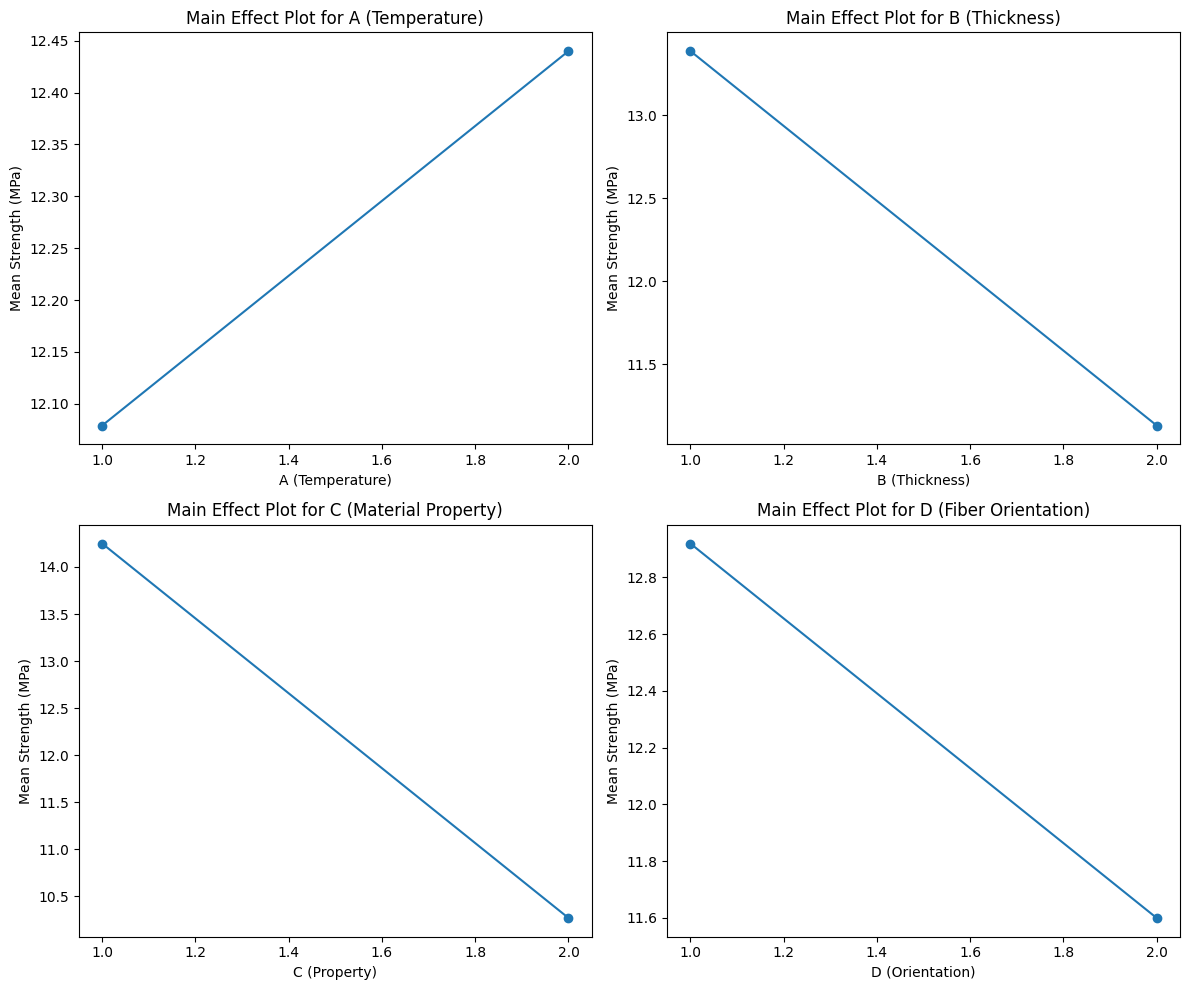

In [487]:
# Calculate the mean of the three strength measurements
df3['Mean Strength'] = df3[['Strength 1 (MPa)', 'Strength 2 (MPa)', 'Strength 3']].mean(axis=1)

# Group by factors to calculate the means for main effects
main_effects = df3.groupby(['A', 'B', 'C', 'D'])['Mean Strength'].mean().reset_index()

# Create main effect plots for factors A, B, C, and D
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Main effect plot for Factor A
axs[0, 0].plot(df3.groupby('A')['Mean Strength'].mean(), marker='o')
axs[0, 0].set_title('Main Effect Plot for A (Temperature)')
axs[0, 0].set_xlabel('A (Temperature)')
axs[0, 0].set_ylabel('Mean Strength (MPa)')

# Main effect plot for Factor B
axs[0, 1].plot(df3.groupby('B')['Mean Strength'].mean(), marker='o')
axs[0, 1].set_title('Main Effect Plot for B (Thickness)')
axs[0, 1].set_xlabel('B (Thickness)')
axs[0, 1].set_ylabel('Mean Strength (MPa)')

# Main effect plot for Factor C
axs[1, 0].plot(df3.groupby('C')['Mean Strength'].mean(), marker='o')
axs[1, 0].set_title('Main Effect Plot for C (Material Property)')
axs[1, 0].set_xlabel('C (Property)')
axs[1, 0].set_ylabel('Mean Strength (MPa)')

# Main effect plot for Factor D
axs[1, 1].plot(df3.groupby('D')['Mean Strength'].mean(), marker='o')
axs[1, 1].set_title('Main Effect Plot for D (Fiber Orientation)')
axs[1, 1].set_xlabel('D (Orientation)')
axs[1, 1].set_ylabel('Mean Strength (MPa)')

plt.tight_layout()
plt.show()

c. Calculate and generate Main effect plots for SN-ratio (use “larger the better” equation).

**Calculated Main Effect for SN-ratio**

In [492]:
# Function to calculate SN ratio for "larger the better"
def calculate_snratio(row):
    strengths = np.array([row['Strength 1 (MPa)'], row['Strength 1 (MPa)'], row['Strength 3']])
    sn_ratio = -10 * np.log10(np.mean(1 / strengths**2))
    return sn_ratio

# Calculate SN ratio for each trial
df3['SN Ratio'] = df3.apply(calculate_snratio, axis=1)

# Now calculate the main effects of each factor on SN Ratio
main_effects = {}

# For each factor (A, B, C, D), we calculate the mean SN ratio for high and low levels
factors = ['A', 'B', 'C', 'D']

for factor in factors:
    mean_low = df3[df3[factor] == df3[factor].min()]['SN Ratio'].mean()
    mean_high = df3[df3[factor] == df3[factor].max()]['SN Ratio'].mean()
    main_effects[factor] = mean_high - mean_low

# Convert main effects to DataFrame for better display
main_effects_SN = pd.DataFrame(list(main_effects.items()), columns=['Factor', 'Main Effect (SN Ratio)'])

print("Main Effects on SN-Ratio:")
print(main_effects_SN)

Main Effects on SN-Ratio:
  Factor  Main Effect (SN Ratio)
0      A               -0.295465
1      B               -1.794697
2      C               -2.767938
3      D               -1.666115


**Main Effect Plots for SN-ratio**

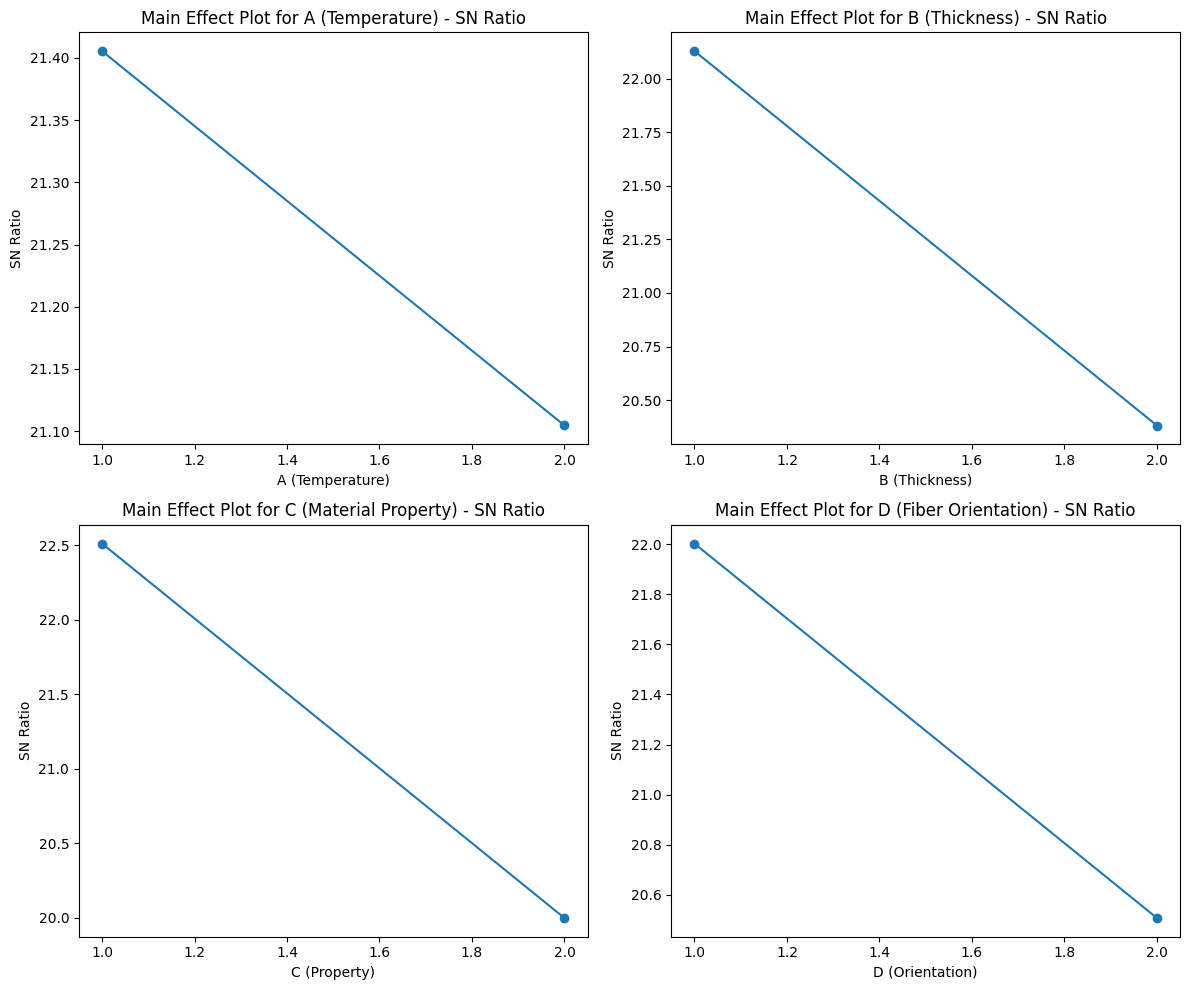

In [488]:
# Define a function to calculate SN-ratio for "larger the better"
def sn_ratio_larger_better(strengths):
    return -10 * np.log10(np.mean(1 / np.array(strengths) ** 2))

# Calculate SN ratio for each trial
df3['SN Ratio'] = df3.apply(lambda row: sn_ratio_larger_better([row['Strength 1 (MPa)'], row['Strength 2 (MPa)'], row['Strength 3']]), axis=1)

# Create main effect plots for SN-ratio for factors A, B, C, and D
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Main effect plot for Factor A
axs[0, 0].plot(df3.groupby('A')['SN Ratio'].mean(), marker='o')
axs[0, 0].set_title('Main Effect Plot for A (Temperature) - SN Ratio')
axs[0, 0].set_xlabel('A (Temperature)')
axs[0, 0].set_ylabel('SN Ratio')

# Main effect plot for Factor B
axs[0, 1].plot(df3.groupby('B')['SN Ratio'].mean(), marker='o')
axs[0, 1].set_title('Main Effect Plot for B (Thickness) - SN Ratio')
axs[0, 1].set_xlabel('B (Thickness)')
axs[0, 1].set_ylabel('SN Ratio')

# Main effect plot for Factor C
axs[1, 0].plot(df3.groupby('C')['SN Ratio'].mean(), marker='o')
axs[1, 0].set_title('Main Effect Plot for C (Material Property) - SN Ratio')
axs[1, 0].set_xlabel('C (Property)')
axs[1, 0].set_ylabel('SN Ratio')

# Main effect plot for Factor D
axs[1, 1].plot(df3.groupby('D')['SN Ratio'].mean(), marker='o')
axs[1, 1].set_title('Main Effect Plot for D (Fiber Orientation) - SN Ratio')
axs[1, 1].set_xlabel('D (Orientation)')
axs[1, 1].set_ylabel('SN Ratio')

plt.tight_layout()
plt.show()


d. Based on b) and c), what can you conclude?

**Main Effect Plots for Means (Question b):**

**Factor A (Temperature):** Increasing temperature results in a slight increase in the mean strength.

**Factor B (Thickness):** As thickness increases, the mean strength decreases significantly.

**Factor C (Material Property):** Increasing material property value causes a notable decrease in mean strength.

**Factor D (Fiber Orientation):** Changing the fiber orientation from 0/45 to 90/45 decreases the mean strength.


**Main Effect Plots for SN Ratio (Question c):**
**Factor A (Temperature):** Increasing temperature reduces the SN ratio, indicating that higher temperatures may lead to less consistent or reliable results.
**Factor B (Thickness):** Increasing thickness significantly reduces the SN ratio, which suggests that larger thicknesses result in more variability in the output strength.

**Factor C (Material Property):** As the material property increases, the SN ratio decreases, showing that higher values of this property result in greater inconsistency.

**Factor D (Fiber Orientation):** Changing fiber orientation from 0/45 to 90/45 significantly reduces the SN ratio, indicating that this change results in less predictable or consistent strength outcomes.

.

**Conclusion:**

Both the **Mean Strength** and the **SN Ratio** plots show similar trends, where the **factors B (Thickness), C (Material Property), and D (Fiber Orientation)** have a **strong negative effect** on the **response (strength)**.
The **decrease in mean strength** is also accompanied by a **reduction in the SN ratio**, indicating that these factors not only reduce the strength but also introduce **more variability and inconsistency**.

**Factor A (Temperature):** While temperature increases the mean strength slightly, it reduces the SN ratio, indicating that higher temperatures might produce slightly stronger results but with more variability.

In summary, the main effects are aligned in both cases, with **factors B, C, and D** significantly affecting the **strength and its consistency**, while **factor A** has a relatively **smaller effect** on the mean strength but still impacts the variability.

Now consider interactions:

e. Can this DoE see any interactions. If so, calculate the effects of these interactions?

**Defining Interaction Terms and including in the Dataframe**

In [489]:
def interaction_A_B(x):
  if x['A'] == 1 and x['B'] == 1:
    return 2
  elif x['A'] == 1 and x['B'] == 2:
    return 1
  elif x['A'] == 2 and x['B'] == 1:
    return 1
  elif x['A'] == 2 and x['B'] == 2:
    return 2

def interaction_A_C(x):
  if x['A'] == 1 and x['C'] == 1:
    return 2
  elif x['A'] == 1 and x['C'] == 2:
    return 1
  elif x['A'] == 2 and x['C'] == 1:
    return 1
  elif x['A'] == 2 and x['C'] == 2:
    return 2

def interaction_A_D(x):
  if x['A'] == 1 and x['D'] == 1:
    return 2
  elif x['A'] == 1 and x['D'] == 2:
    return 1
  elif x['A'] == 2 and x['D'] == 1:
    return 1
  elif x['A'] == 2 and x['D'] == 2:
    return 2

def interaction_B_C(x):
  if x['B'] == 1 and x['C'] == 1:
    return 2
  elif x['B'] == 1 and x['C'] == 2:
    return 1
  elif x['B'] == 2 and x['C'] == 1:
    return 1
  elif x['B'] == 2 and x['C'] == 2:
    return 2

def interaction_B_D(x):
  if x['B'] == 1 and x['D'] == 1:
    return 2
  elif x['B'] == 1 and x['D'] == 2:
    return 1
  elif x['B'] == 2 and x['D'] == 1:
    return 1
  elif x['B'] == 2 and x['D'] == 2:
    return 2

def interaction_C_D(x):
  if x['C'] == 1 and x['D'] == 1:
    return 2
  elif x['C'] == 1 and x['D'] == 2:
    return 1
  elif x['C'] == 2 and x['D'] == 1:
    return 1
  elif x['C'] == 2 and x['D'] == 2:
    return 2

In [490]:
df3['AB'] = df3.apply(interaction_A_B, axis=1)
df3['AC'] = df3.apply(interaction_A_C, axis=1)
df3['BC'] = df3.apply(interaction_B_C, axis=1)
df3['BD'] = df3.apply(interaction_B_D, axis=1)
df3['CD'] = df3.apply(interaction_C_D, axis=1)
df3['AD'] = df3.apply(interaction_A_D, axis=1)

df3.head()

,Trial,A,B,C,D,Strength 1 (MPa),Strength 2 (MPa),Strength 3,Mean Strength,SN Ratio,AB,AC,BC,BD,CD,AD
0,1,1,1,1.0,1,15.70,16.31,11.20,14.403333,22.787922,2,2,2,2,2,2
1,2,1,1,1.0,2,12.62,13.64,12.10,12.786667,22.103274,2,2,2,1,1,1
2,3,1,1,2.0,1,11.99,12.86,10.20,11.683333,21.227359,2,1,1,2,1,2
3,4,1,1,2.0,2,9.06,10.36,13.44,10.953333,20.451810,2,1,1,1,2,1
4,5,1,2,1.0,1,12.97,13.38,12.11,12.820000,22.135028,1,2,1,1,2,2


In [493]:
# Calculate mean response for each interaction
interaction_effects = {}

for interaction in ['AB', 'AC', 'AD', 'BC', 'BD', 'CD']:
    high_level_mean = df3[df3[interaction] == 2]['Mean Strength'].mean()
    low_level_mean = df3[df3[interaction] == 1]['Mean Strength'].mean()
    interaction_effects[interaction] = high_level_mean - low_level_mean


# Display the interaction effects
interaction_effects_df = pd.DataFrame(list(interaction_effects.items()), columns=['Interaction', 'Effect'])
interaction_effects_df

,Interaction,Effect
0,AB,-1.500000
1,AC,-1.905000
2,AD,0.355000
3,BC,1.564167
4,BD,-1.102500
5,CD,-0.670833


f. Based on e), how would you update your conclusions?

**Updated Conclusion:**

**AC and AB** interactions show **large negative** effects on strength, indicating that the combination of temperature with thickness and material property further weakens the response.

**BC interaction** has a large positive effect, suggesting that thickness and material property together improve strength.

**AD, BD, and CD** interactions have smaller effects but still contribute to variability.

This emphasizes that the combined effects of factors, particularly thickness, material property, and temperature, play significant roles in strength outcomes.